# Widgets Components

Herein, we present the widgets that can be used as components in order to synthesize higher level widgets, such as the ones presented in _Main Widgets.ipynb_. Those widgets live in `menpo.visualize.widgets.options`. Specifically we split this notebook in the following subsections:

1. __Basics__
2. __Animation Options__
3. __Channels Options__
4. __Landmarks Options__
5. __Renderer Options__
6. __Graph Options__
7. __Text Print__
8. __Feature Options__
9. __Save Figure Options__

### 1. Basics

All those options widgets presented here are subclasses of `FlexBox` from `IPython.html.widgets`. They also share some common functionality. Specifically, they all implement their own versions of the following functions:

* _add_render_function()_: Adds a render function to be used as a callback whenever a widget value changes.
* _remove_render_function()_: Removes the render function that is attached to the widget.
* _replace_render_function()_: Replaces the existing render function with a new one.
* _set_widget_state()_: It updates the widget state with a new set of options. It has an _allow_callback_ argument that defines whether the render function is allowed to be triggered if required.
* _style()_: It takes a set of options that change the style of the widget, such as font-related options, border-related options, etc.
* _predefined_style()_: It sets some predefined styles (themes) on the widget. Possible options are `'minimal'`, `'success'`, `'info'`, `'warning'` and `'danger'`.

Before presenting each widget separately, let's first import the things that are required.

In [1]:
from menpo.visualize.widgets import (AnimationOptionsWidget, ChannelOptionsWidget, LandmarkOptionsWidget, 
                                     RendererOptionsWidget, GraphOptionsWidget, TextPrintWidget, 
                                     FeatureOptionsWidget, SaveFigureOptionsWidget)
from menpo.visualize import print_dynamic
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### 2. Animation Options

The aim of this widget is to allow the user to browse through a set of objects (e.g. images, shapes, etc.). Thus, it provides the ability to select an index by some controllers (e.g. slider ot buttons). It also provides the ability to animate by hiting a _Play_ button. 

The initial options are defined as a `dict`. We also define a `render_function()` that prints the selected options.

In [2]:
index = {'min': 0, 'max': 100, 'step': 1, 'index': 10}

def render_function(name, value):
    s = anim_wid.selected_values
    print_dynamic(s)
    
anim_wid = AnimationOptionsWidget(index, 
                                  index_style='buttons', 
                                  render_function=render_function, 
                                  style='info')
display(anim_wid)

This is the new function. Index = 20

We can replace the `render_function()` with a new one as follows:

In [3]:
def new_render_function(name, value):
    print_dynamic('This is the new function. Index = {}'.format(anim_wid.selected_values['index']))
anim_wid.replace_render_function(new_render_function)

The style of the widget can also be changed either by passing explicit options

In [4]:
anim_wid.predefined_style('minimal')

or by using the predefined themes

In [5]:
anim_wid.style(box_style='warning', border_visible=True, border_color='black',
               border_style='dashed', border_width=2, border_radius=10, padding=0,
               margin=0, font_family='sans', font_size=12, font_style='italic', 
               font_weight='')

Finally, the options of the widget can be updated by using the ``set_widget_state()` function as

In [6]:
new_options = {'min': 0, 'max': 20, 'step': 2, 'index': 16}

anim_wid.set_widget_state(new_options, allow_callback=False)

### 3. Channels Options

The aim of this widget is to allow the user to select options related with an `Image`'s channels, that are useful for visualizing it. 

The initial options are defined as a `dict`. We also define a `render_function()` that prints the selected channels to be visualized along with the `masked_enabled` and `glyph_enabled` flags.

In [7]:
channel_options = {'n_channels': 30,
                   'image_is_masked': True,
                   'channels': [0, 10],
                   'glyph_enabled': False,
                   'glyph_block_size': 3,
                   'glyph_use_negative': False,
                   'sum_enabled': True,
                   'masked_enabled': True}

def render_function(name, value):
    s = "Channels: {}. Gryph: {}. Masked: {}".format(chan_wid.selected_values['channels'],
                                                     chan_wid.selected_values['glyph_enabled'],
                                                     chan_wid.selected_values['masked_enabled'])
    print_dynamic(s)
    
chan_wid = ChannelOptionsWidget(channel_options, render_function=render_function, style='danger')
display(chan_wid)

Channels: [9, 10, 11, 12, 13, 14]. Gryph: False. Masked: True

The state of the widget can be updated with a new set of options as

In [8]:
new_options = {'n_channels': 10, 
               'image_is_masked': True, 
               'channels': [7, 8, 9], 
               'glyph_enabled': True, 
               'glyph_block_size': 3, 
               'glyph_use_negative': True, 
               'sum_enabled': False, 
               'masked_enabled': False}
chan_wid.set_widget_state(new_options, allow_callback=True)

Channels: [7, 8, 9]. Gryph: True. Masked: False

### 4. Landmarks Options

The aim of this widget is to allow the user to select options related with landmarks that are useful for visualizing. 

The initial options are defined as a `dict`. We also define a `render_function()` that prints the selected group and labels.

In [9]:
landmark_options = {'has_landmarks': True,
                    'render_landmarks': True,
                    'group_keys': ['PTS', 'ibug_face_68'],
                    'labels_keys': [['all'], ['jaw', 'eye']],
                    'group': 'ibug_face_68',
                    'with_labels': ['eye']}

def render_function(name, value):
    s = "Group: {}. Labels: {}.".format(land_wid.selected_values['group'], land_wid.selected_values['with_labels'])
    print_dynamic(s)
    
land_wid = LandmarkOptionsWidget(landmark_options, render_function=render_function, style='success')
display(land_wid)

Group: ibug_face_68. Labels: ['jaw'].

Once again, the state of the widget, the render function and the style can be updated using the `set_widget_state()`, `replace_render_function()` and `predefined_style()` functions respectively.

In [10]:
# replace render function
def render_function(name, value):
    s = "Render: {}. Group: {}. Labels: {}.".format(land_wid.selected_values['render_landmarks'], 
                                                    land_wid.selected_values['group'], 
                                                    land_wid.selected_values['with_labels'])
    print_dynamic(s)
land_wid.replace_render_function(render_function)

# update widget options
new_options = {'has_landmarks': True,
               'render_landmarks': True,
               'group_keys': ['PTS', 'other'],
               'labels_keys': [['all'], ['land', 'marks']],
               'group': 'other',
               'with_labels': ['marks']}
land_wid.set_widget_state(new_options, allow_callback=False)

# update style
land_wid.predefined_style(style='danger')

### 5. Renderer Options

The aim of this widget is to allow the user to select options related with rendering. It can accomodate various groups of options that can be related to markers, lines, axes/figure, legend, grid, numbering and image. The user has the ability to select which groups of options to use. The options of each group are defined as `dict`s 

In [11]:
lines_opt = {'render_lines': True,
             'line_width': 1,
             'line_colour': ['b', 'r'],
             'line_style': '-'}
markers_opt = {'render_markers': True,
               'marker_size': 20,
               'marker_face_colour': ['w', 'w'],
               'marker_edge_colour': ['b', 'r'],
               'marker_style': 'o',
               'marker_edge_width': 1}
numbering_opt = {'render_numbering': True,
                 'numbers_font_name': 'serif',
                 'numbers_font_size': 10,
                 'numbers_font_style': 'normal',
                 'numbers_font_weight': 'normal',
                 'numbers_font_colour': ['k'],
                 'numbers_horizontal_align': 'center',
                 'numbers_vertical_align': 'bottom'}
legend_opt = {'render_legend': True,
              'legend_title': '',
              'legend_font_name': 'serif',
              'legend_font_style': 'normal',
              'legend_font_size': 10,
              'legend_font_weight': 'normal',
              'legend_marker_scale': 1.,
              'legend_location': 2,
              'legend_bbox_to_anchor': (1.05, 1.),
              'legend_border_axes_pad': 1.,
              'legend_n_columns': 1,
              'legend_horizontal_spacing': 1.,
              'legend_vertical_spacing': 1.,
              'legend_border': True,
              'legend_border_padding': 0.5,
              'legend_shadow': False,
              'legend_rounded_corners': True}
figure_opt = {'x_scale': 1.,
              'y_scale': 1.,
              'render_axes': True,
              'axes_font_name': 'serif',
              'axes_font_size': 10,
              'axes_font_style': 'normal',
              'axes_font_weight': 'normal',
              'axes_x_limits': None,
              'axes_y_limits': None}
grid_opt = {'render_grid': True,
            'grid_line_style': '--',
            'grid_line_width': 0.5}
image_opt = {'alpha': 1.,
             'interpolation': 'bilinear',
             'cmap_name': 'gray'}

Then the groups of options that the user wants to have should be added in a separate `dict` as

In [12]:
example_rendering_dict = {'lines': lines_opt,
                          'markers': markers_opt,
                          'numbering': numbering_opt,
                          'legend': legend_opt,
                          'figure': figure_opt,
                          'grid': grid_opt,
                          'image': image_opt}

The widget supports the ability to have a different set of options for different objects. So the options that are passed in the widget constructor mush have the form of `list` of `dict`s, where each `dict` has the initial options for each object. 

For example, assume that we want to define all the options groups for two types of objects. The `list` of initial options is defined as

In [13]:
# the figure, grid, legend, image and numbering options will be common for both objects
figure_options = {'x_scale': 1., 'y_scale': 1., 'render_axes': True, 'axes_font_name': 'serif', 
                  'axes_font_size': 10, 'axes_font_style': 'normal', 'axes_font_weight': 'normal', 
                  'axes_x_limits': None, 'axes_y_limits': None}
grid_options = {'render_grid': True, 'grid_line_style': '--', 'grid_line_width': 0.5}
legend_options = {'render_legend': False, 'legend_title': '', 'legend_font_name': 'serif', 
                  'legend_font_style': 'normal', 'legend_font_size': 10, 'legend_font_weight': 'normal', 
                  'legend_marker_scale': 1., 'legend_location': 2, 'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1., 'legend_n_columns': 1, 'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1., 'legend_border': True, 'legend_border_padding': 0.5,
                  'legend_shadow': False, 'legend_rounded_corners': True}
image_options = {'alpha': 1., 'interpolation': 'bilinear', 'cmap_name': 'gray'}
numbering_options = {'render_numbering': True, 'numbers_font_name': 'serif', 'numbers_font_size': 10,
                     'numbers_font_style': 'normal', 'numbers_font_weight': 'normal', 'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center', 'numbers_vertical_align': 'bottom'}

# the lines and markers options are going to be different for each object
lines_options = {'render_lines': True, 'line_width': 1, 'line_colour': ['b', 'r'], 'line_style': '-'}
markers_options = {'render_markers': True, 'marker_size': 20, 'marker_face_colour': ['w', 'w'],
                   'marker_edge_colour': ['b', 'r'], 'marker_style': 'o', 'marker_edge_width': 1}
rendering_dict_1 = {'lines': lines_options, 'markers': markers_options, 'numbering': numbering_options,
                    'legend': legend_options, 'figure': figure_options, 'grid': grid_options, 
                    'image': image_options}

lines_options = {'render_lines': True, 'line_width': 100, 'line_colour': [[0.1, 0.2, 0.3]], 'line_style': '-'}
markers_options = {'render_markers': True, 'marker_size': 200, 'marker_face_colour': [[0.1, 0.2, 0.3]],
                   'marker_edge_colour': ['m'], 'marker_style': 'x', 'marker_edge_width': 1}
rendering_dict_2 = {'lines': lines_options, 'markers': markers_options, 'numbering': numbering_options,
                    'legend': legend_options, 'figure': figure_options, 'grid': grid_options, 
                    'image': image_options}

# final list of dicts with options per object
rendering_options = [rendering_dict_1, rendering_dict_2]

We now need to define some additional input arguments. Specifically:

* _options_tabs_: `List` with the options groups that will be used (`'lines'`, `'markers'`, `'numbering'`, `'figure_one'`, `'figure_two'`, `'legend'`, `'grid'`, `'image'`). The difference between `'figure_one'` and `'figure_two'` is that the first one has a single slider that changes both height and width of a figure, while the second one has two sliders, one for each dimension.
* _objects_names_: A `list` with the names of the different objects. These names will be used in a dropdown menu for selecting through the various objects.
* _labels_per_object_: A `list` that contains a `list` of labels for each object. This is useful in case the user wants to define different colours per label of an object.
* _selected_object_: The index of the initially selected object.
* _object_selection_dropdown_visible_: Whether the object selection dropdown menu will be visible. Note that it is invisible by default in case there is only one object.

We also define a `render_function()` that prints the selected lines options for the 1st object.

In [14]:
options_tabs = ['lines', 'markers', 'numbering', 'figure_two', 'legend', 'grid', 'image']
objects_names = ['Shape 1', 'Shape 2']
labels_per_object = [['eyes', 'mouth'], None]
selected_object = 1
object_selection_dropdown_visible = True

def render_function(name, value):
    print_dynamic("Shape 1: {}".format(rend_wid.selected_values[0]['lines']))

In [15]:
rend_wid = RendererOptionsWidget(rendering_options, 
                                 options_tabs=options_tabs, 
                                 objects_names=objects_names, 
                                 labels_per_object=labels_per_object, 
                                 selected_object=selected_object, 
                                 object_selection_dropdown_visible=object_selection_dropdown_visible, 
                                 render_function=render_function, style='info', tabs_style='danger')
display(rend_wid)

Shape 1: {'render_lines': False, 'line_width': 1.0, 'line_style': '-', 'line_colour': ['b', 'r']}

Once again, we can set a different predefined theme as

In [16]:
rend_wid.predefined_style('warning', 'info')

Finally, the state of the widget can also be updated using the `set_widget_state()` function and by passing in a different set of options. Now that the number of objects cannot change, but their labels can.

In [17]:
lines_options = {'render_lines': False, 'line_width': 1, 'line_colour': ['r'], 'line_style': '-'}
markers_options = {'render_markers': False, 'marker_size': 20, 'marker_face_colour': ['k'],
                   'marker_edge_colour': ['c'], 'marker_style': 'o', 'marker_edge_width': 1}
numbering_options = {'render_numbering': True, 'numbers_font_name': 'serif', 'numbers_font_size': 10,
                     'numbers_font_style': 'normal', 'numbers_font_weight': 'normal', 'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center', 'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': True, 'legend_title': '', 'legend_font_name': 'serif', 
                  'legend_font_style': 'normal', 'legend_font_size': 10, 'legend_font_weight': 'normal',
                  'legend_marker_scale': 1., 'legend_location': 2, 'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1., 'legend_n_columns': 1, 'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1., 'legend_border': True, 'legend_border_padding': 0.5,
                  'legend_shadow': False, 'legend_rounded_corners': True}
figure_options = {'x_scale': 1., 'y_scale': 1., 'render_axes': True, 'axes_font_name': 'serif',
                  'axes_font_size': 10, 'axes_font_style': 'normal', 'axes_font_weight': 'normal', 
                  'axes_x_limits': None, 'axes_y_limits': None}
grid_options = {'render_grid': True, 'grid_line_style': '--', 'grid_line_width': 0.5}
image_options = {'alpha': 0.5, 'interpolation': 'bilinear', 'cmap_name': 'gray'}
rendering_dict_1 = {'lines': lines_options, 'markers': markers_options, 'numbering': numbering_options,
                    'legend': legend_options, 'figure': figure_options, 'grid': grid_options, 
                    'image': image_options}


lines_options = {'render_lines': True, 'line_width': 100, 'line_colour': [[0.1, 0.2, 0.3], 'b'], 'line_style': '-'}
markers_options = {'render_markers': True, 'marker_size': 200, 'marker_face_colour': [[0.123, 0.234, 0.345], 'r'],
                   'marker_edge_colour': ['m', 'm'], 'marker_style': 'x', 'marker_edge_width': 1}
numbering_options = {'render_numbering': True, 'numbers_font_name': 'serif', 'numbers_font_size': 10,
                     'numbers_font_style': 'normal', 'numbers_font_weight': 'normal', 'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center', 'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': True, 'legend_title': '', 'legend_font_name': 'serif', 
                  'legend_font_style': 'normal', 'legend_font_size': 10, 'legend_font_weight': 'normal',
                  'legend_marker_scale': 1., 'legend_location': 2, 'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1., 'legend_n_columns': 1, 'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1., 'legend_border': True, 'legend_border_padding': 0.5,
                  'legend_shadow': False, 'legend_rounded_corners': True}
figure_options = {'x_scale': 1., 'y_scale': 1., 'render_axes': True, 'axes_font_name': 'serif',
                  'axes_font_size': 10, 'axes_font_style': 'normal', 'axes_font_weight': 'normal',
                  'axes_x_limits': None, 'axes_y_limits': None}
grid_options = {'render_grid': True, 'grid_line_style': '--', 'grid_line_width': 0.5}
image_options = {'alpha': 0.0, 'interpolation': 'bilinear', 'cmap_name': 'gray'}
rendering_dict_2 = {'lines': lines_options, 'markers': markers_options, 'numbering': numbering_options,
                    'legend': legend_options, 'figure': figure_options, 'grid': grid_options, 
                    'image': image_options}

new_options = [rendering_dict_1, rendering_dict_2]
labels_per_object = [['1'], ['land', 'marks']]

In [18]:
def render_function(name, value):
    print_dynamic("Shape 1: {}".format(rend_wid.selected_values[1]['lines']))

rend_wid.replace_render_function(render_function)
rend_wid.set_widget_state(new_options, labels_per_object, allow_callback=True)

Shape 1: {'render_lines': True, 'line_width': 100, 'line_style': '-', 'line_colour': [[0.1, 0.2, 0.3], 'b']}

### 6. Graph Options

The aim of this widget is to allow the user to select options related with plotting a graph. It can accomodate options for different curves that are related to markers, lines, axes/figure, legend and grid.

The options are defined in a `dict`. Note that all the lines and markers options are defined as `list`s of length equal to the number of curves. The rest of the options are common for all curves.

In [19]:
graph_options = {'legend_entries': ['Sin', 'Cos'], 'x_label': 'X', 'y_label': 'Y', 'title': 'Sin and Cos',
                 'x_axis_limits': (2, 7), 'y_axis_limits': (-0.2, 0.2), 
                 'render_lines': [True, True], 'line_colour': ['r', 'b'], 'line_style': ['--', '-'], 
                 'line_width': [1, 3],
                 'render_markers': [True, False], 'marker_style': ['o', 's'], 'marker_size': [6, 12],
                 'marker_face_colour': ['k', 'm'], 'marker_edge_colour': ['w', 'c'], 'marker_edge_width': [1, 4],
                 'render_legend': True, 'legend_title': '', 'legend_font_name': 'sans-serif',
                 'legend_font_style': 'normal', 'legend_font_size': 10, 'legend_font_weight': 'normal',
                 'legend_marker_scale': 1., 'legend_location': 2, 'legend_bbox_to_anchor': (1.05, 1.),
                 'legend_border_axes_pad': 0., 'legend_n_columns': 1, 'legend_horizontal_spacing': 0,
                 'legend_vertical_spacing': 0, 'legend_border': True, 'legend_border_padding': 0, 
                 'legend_shadow': False, 'legend_rounded_corners': False, 
                 'render_axes': True, 'axes_font_name': 'sans-serif', 'axes_font_size': 10, 
                 'axes_font_style': 'normal', 'axes_font_weight': 'normal', 'figure_size': (10, 8),
                 'render_grid': True, 'grid_line_style': '--', 'grid_line_width': 1}

Let's define a render function that plots the line colour for each curve and display the widget

In [20]:
def render_function(name, value):
    s = "Line colours per curve: {}".format(gra_wid.selected_values['line_colour'])
    print_dynamic(s)

gra_wid = GraphOptionsWidget(graph_options, 
                             x_slider_options=(0, 10, 1), 
                             y_slider_options=(-0.5, 0.5, 0.1), 
                             render_function=render_function, 
                             style='info', tabs_style='warning', renderer_tabs_style='danger')
display(gra_wid)

Line colours per curve: ['r', 'b']

Note that `GraphOptionsWidget` is the only widget that doesn't implement the `set_widget_state()' function.

### 7. Text Print

The aim of this widget is to allow the user to print text within a widget. It gets 2 arguments: the number of lines of the text to be printed and a `list` of length equal to the number of lines.

In [21]:
n_lines = 3
text_per_line = ['> This is the', '> Text Print widget!', '> :-)']

txt_wid = TextPrintWidget(n_lines, text_per_line, style='danger')
display(txt_wid)

Of course the widget text and number of lines can be updated.

In [22]:
txt_wid.set_widget_state(5, ['M', 'E', 'N', 'P', 'O'])

### 8. Feature Options

This widget is very simple and is designed in order to be used by the `features_selection()` widget. It doesn't get any input options.

In [23]:
feat_wid = FeatureOptionsWidget(style='minimal')
display(feat_wid)

The actaul features function and options are stored in

In [24]:
print feat_wid.features_function
print feat_wid.features_options

1
{'double_angles': True}


### 9. Save Figure Options

The aim of this widget is to allow the user to save a figure to file. It expects as input the renderer object that was used to render a figure (class `Renderer`).

Let's first generate such a renderer by visualizing an image

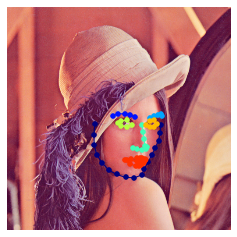

In [25]:
%matplotlib inline
import menpo.io as mio

im = mio.import_builtin_asset.lenna_png()
renderer = im.view_landmarks(figure_size=(6, 4))

Then the widget can be called as

In [26]:
save_wid = SaveFigureOptionsWidget(renderer, style='warning')
display(save_wid)

Of course, this widget can be used as is in order to save any generated visualization.